<a href="https://colab.research.google.com/github/sebas-sv/IABD/blob/main/Solis_Vilches_Sebastian_PIA_Tarea05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Apartado 1: Carga y explora el dataset CIFAR10

**Inicia un nuevo notebook, preferiblemente en Google Colab. Para guiarte en el proceso, puedes utilizar este cuaderno-guía con algunas sugerencias de fragmentos de código indicados en las celdas de texto, pero tendrás que escribir el código en la celda de código correspondiente y ejecutarlo.**

https://colab.research.google.com/github/sebas-sv/IABD/blob/main/Solis_Vilches_Sebastian_PIA_Tarea05.ipynb


**Importa la librerías Numpy.**

In [ ]:
import numpy as np

**Importa los módulos necesarios para construir una red neuronal profunda: Sequential, Dense y Flatten.**


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten

#Apartado 2: Importa el dataset CIFAR10 de Keras, en un conjunto de datos de entrenamiento y un conjunto de datos para test.

**Consulta la [documentación de Keras relativa a este dataset](https://keras.io/api/datasets/cifar10/) para entender cómo están organizados los datos y saber importarlos.**

In [ ]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


#Apartado 3: Explora los datos.

**Explora los datos, especialmente, las dimensiones del dataset.**

In [ ]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


**Aplica normalización a los datos de entrada.**

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


**Aplica la técnica one-hot encoding al conjunto de datos de salida.**

In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

**En general, aplica las funciones necesarias para entender cómo son los datos para poder crear el modelo de forma adecuada y entender también los resultados del entrenamiento.**

In [ ]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 10)


In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
print('Valores únicos en el conjunto de datos de salida')
print('Unique labels:', unique)
print('Label counts:', counts)

Valores únicos en el conjunto de datos de salida
Unique labels: [0. 1.]
Label counts: [450000  50000]


Algunas mágenes del conjunto de datos de entrada


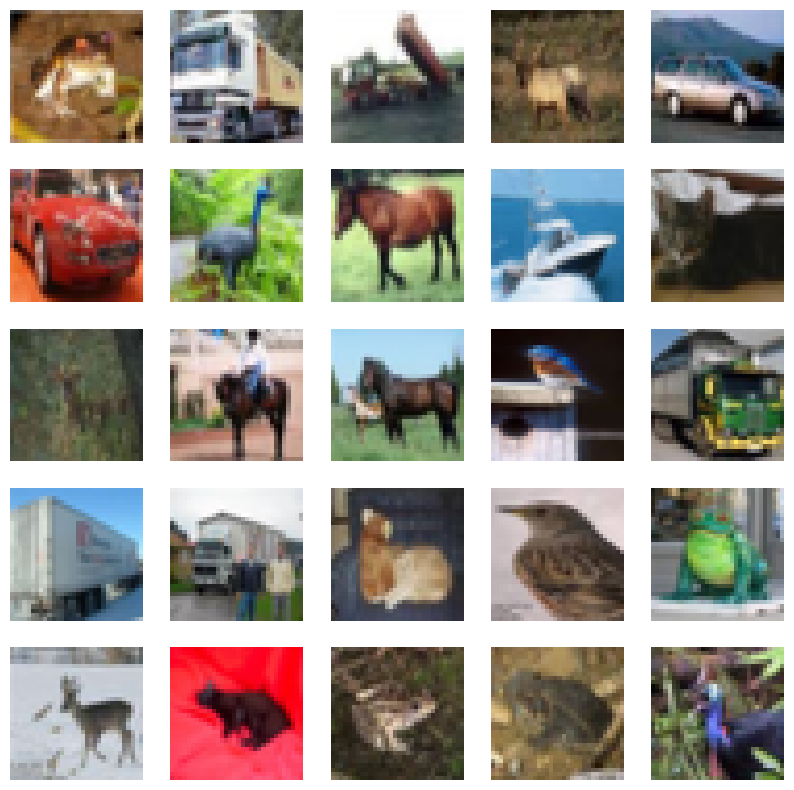

In [ ]:
import matplotlib.pyplot as plt

print('Algunas mágenes del conjunto de datos de entrada')
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10,10))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_train[i])
    ax.axis('off')
plt.show()

#Apartado 4: Crea el modelo.

**Genera un modelo con la clase Sequential.**


In [ ]:
model = Sequential()

**Añade el menor número de capas posible, utilizando las clases Dense y Flatten.**


In [ ]:
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 10)                30730     
                                                                 
Total params: 30730 (120.04 KB)
Trainable params: 30730 (120.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Apartado 5: Entrena el modelo.

**Configura el modo de entrenamiento con el método compile. Utiliza la función loss = 'categorical_crossentropy'. Selecciona el optimizador Adam.**

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


**Utiliza la función fit para entrenar el modelo, con un máximo de 20 epochs.**

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 5s 3ms/step - loss: 5.1168 - accuracy: 0.1168 - val_loss: 5.1530 - val_accuracy: 0.1152
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 5.1168 - accuracy: 0.1168 - val_loss: 5.1530 - val_accuracy: 0.1152
Epoch 3/20
1563/1563 [==============================] - 4s 3ms/step - loss: 5.1168 - accuracy: 0.1168 - val_loss: 5.1530 - val_accuracy: 0.1152
Epoch 4/20
1563/1563 [==============================] - 4s 3ms/step - loss: 5.1169 - accuracy: 0.1168 - val_loss: 5.1530 - val_accuracy: 0.1152
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 5.1169 - accuracy: 0.1168 - val_loss: 5.1530 - val_accuracy: 0.1152
Epoch 6/20
1563/1563 [==============================] - 4s 3ms/step - loss: 5.1168 - accuracy: 0.1168 - val_loss: 5.1530 - val_accuracy: 0.1152
Epoch 7/20
1563/1563 [==============================] - 4s 3ms/step - loss: 5.1168 - accuracy: 0.1168 - val_loss: 5.1530 - val_accuracy:

#Apartado 6: Mejora el modelo.


**Crea un nuevo modelo con más capas y mayor número de neuronas.**


In [ ]:
second_model = Sequential()
second_model.add(Flatten(input_shape=(32, 32, 3)))
second_model.add(Dense(32, activation='relu'))
second_model.add(Dense(32, activation='relu'))
second_model.add(Dense(10, activation='softmax'))

second_model.compile(loss='categorical_crossentropy', optimizer='adam')

**Entrénalo utilizando un número mayor de epochs y analiza el resultado.**

In [ ]:
second_training = second_model.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test))


Epoch 1/40
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9282 - val_loss: 1.8211
Epoch 2/40
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7893 - val_loss: 1.7689
Epoch 3/40
1563/1563 [==============================] - 11s 7ms/step - loss: 1.7432 - val_loss: 1.7313
Epoch 4/40
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7153 - val_loss: 1.6859
Epoch 5/40
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6960 - val_loss: 1.7563
Epoch 6/40
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6779 - val_loss: 1.6867
Epoch 7/40
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6651 - val_loss: 1.6680
Epoch 8/40
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6553 - val_loss: 1.6559
Epoch 9/40
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6473 - val_loss: 1.6700
Epoch 10/40
1563/1563 [==============================] - 6s 4ms/step - loss: 1.64

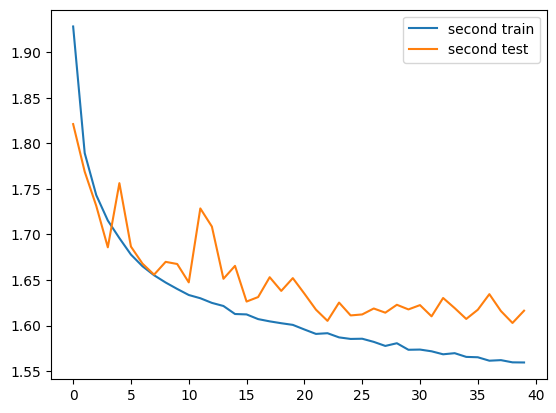

In [ ]:
plt.plot(second_training.history['loss'], label='second train')
plt.plot(second_training.history['val_loss'], label='second test')

plt.legend()
plt.show()

**¿Has conseguido mejorar la precisión? haz varias pruebas y quédate con el modelo que mejores resultados da.**

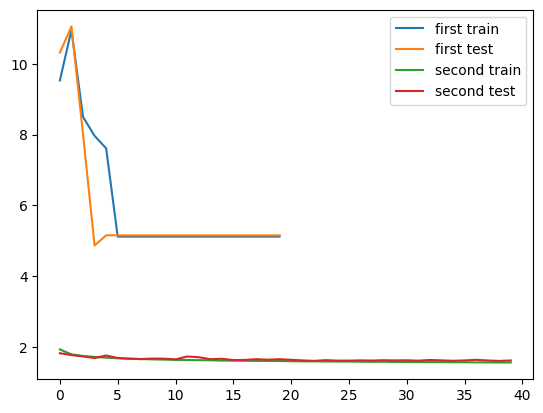

In [ ]:
plt.plot(training.history['loss'], label='first train')
plt.plot(training.history['val_loss'], label='first test')

plt.plot(second_training.history['loss'], label='second train')
plt.plot(second_training.history['val_loss'], label='second test')

plt.legend()
plt.show()

Sí, se ha mejorado la precicisón bastante como se muestra en la anterior gráfica




In [ ]:
from keras import regularizers
from keras.layers import Dropout
from keras.layers import Conv2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D

third_model = Sequential()
third_model.add(Flatten(input_shape=(32, 32, 3)))
third_model.add(Dense(128, activation='relu'))
third_model.add(Dense(64, activation='relu'))
third_model.add(Dense(32, activation='relu'))
third_model.add(Dense(10, activation='softmax'))

third_model.compile(loss='categorical_crossentropy', optimizer='adam')
third_training = third_model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))


Epoch 1/30
1563/1563 [==============================] - 12s 7ms/step - loss: 1.9070 - val_loss: 1.7787
Epoch 2/30
1563/1563 [==============================] - 11s 7ms/step - loss: 1.7184 - val_loss: 1.7534
Epoch 3/30
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6558 - val_loss: 1.6339
Epoch 4/30
1563/1563 [==============================] - 12s 7ms/step - loss: 1.6069 - val_loss: 1.5705
Epoch 5/30
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5724 - val_loss: 1.5529
Epoch 6/30
1563/1563 [==============================] - 12s 7ms/step - loss: 1.5383 - val_loss: 1.6030
Epoch 7/30
1563/1563 [==============================] - 12s 7ms/step - loss: 1.5191 - val_loss: 1.4963
Epoch 8/30
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4943 - val_loss: 1.5111
Epoch 9/30
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4857 - val_loss: 1.4931
Epoch 10/30
1563/1563 [==============================] - 11s 7ms/step - l

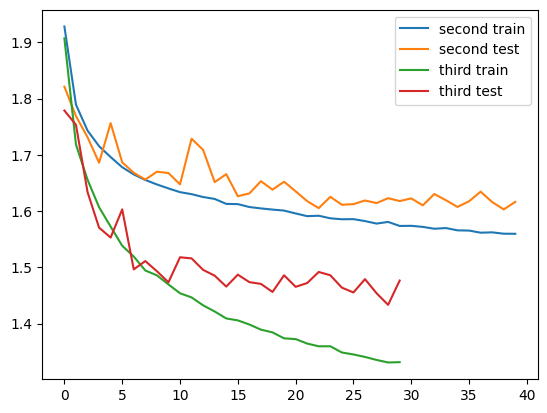

In [ ]:
plt.plot(second_training.history['loss'], label='second train')
plt.plot(second_training.history['val_loss'], label='second test')

plt.plot(third_training.history['loss'], label='third train')
plt.plot(third_training.history['val_loss'], label='third test')

plt.legend()
plt.show()

Con el tercer intento, solo un poco más pesado de entrenar pero con menor epoch, se consigue mejorar la pérdida desde las primeras iteraciones


#Apartado 7: Evalúa el nuevo modelo.


**Utiliza el método evaluate para ver la precisión que se alcanzaría con datos nuevos, aplicándolo al conjunto de datos de test.**

In [ ]:
first_accuracy = model.evaluate(x_test, y_test)
print("First model accuracy: ", first_accuracy)

second_accuracy = second_model.evaluate(x_test, y_test)
print("Second model accuracy: ", second_accuracy)

third_accuracy = third_model.evaluate(x_test, y_test)
print("Third model accuracy: ", third_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 5.1530
First model accuracy:  5.152956485748291
313/313 [==============================] - 1s 2ms/step - loss: 1.6164
Second model accuracy:  1.6163969039916992
313/313 [==============================] - 1s 2ms/step - loss: 1.4764
Third model accuracy:  1.4764372110366821


**¿Es muy diferente a la precisión alcanzada en el entrenamiento?**


Es una media bastante apoximada

#Apartado 8: Visualiza las predicciones.


**Explora de forma visual la precisión que se consigue, representando las primeras 25 imágenes del conjunto de datos de test, y comparando la etiqueta real con la de la predicción. En la guía tienes un script sugerido para ayudarte con el código.**

In [ ]:
# Se asocia cada etiqueta numérica con su nombre correspondiente
label_dict = {0: "Avión", 1: "Automóvil", 2: "Pájaro", 3: "Gato", 4: "Ciervo", 5: "Perro", 6: "Rana", 7: "Caballo", 8: "Barco", 9: "Camión"}
# Casos de prueba
test_cases = 25

313/313 [==============================] - 1s 2ms/step
ACIERTOS PRIMER MODELO: 4/25


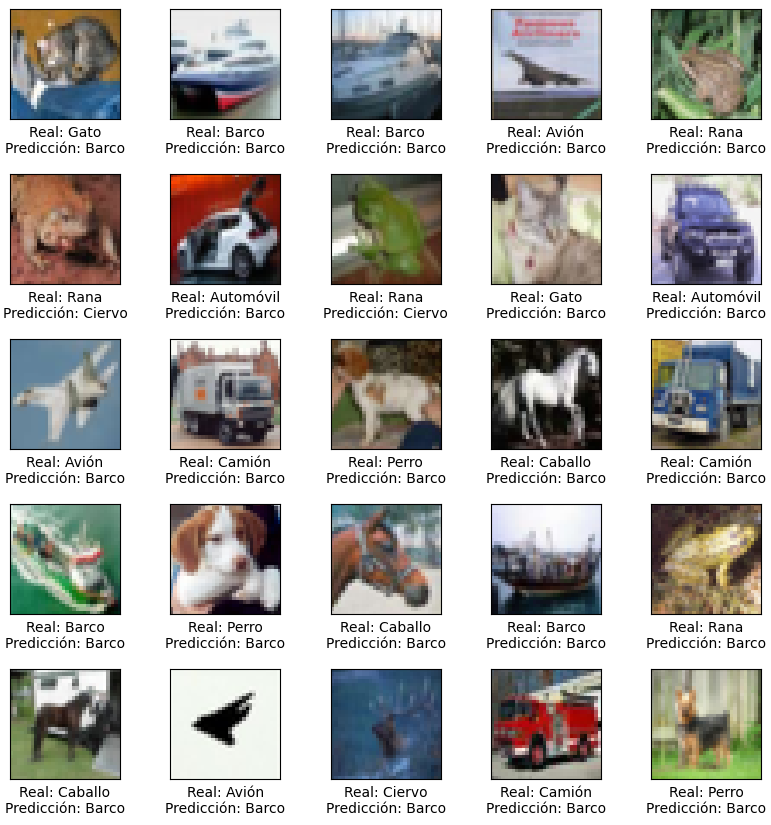

In [ ]:
# Primer modelo
y_pred = model.predict(x_test)

# Convertir las etiquetas predichas y reales en arrays de una dimensión
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Convertir las etiquetas numéricas en nombres de objetos utilizando el diccionario
y_pred_names = [label_dict[label] for label in y_pred_labels]
y_test_names = [label_dict[label] for label in y_test_labels]

# Seleccionar las primeras 25 imágenes del conjunto de datos de prueba
images = x_test[:test_cases]
labels = y_test_names[:test_cases]
predictions = y_pred_names[:test_cases]

# Crear una figura de 5x5 subplots y mostrar las imágenes junto con sus etiquetas reales y predichas
fig, axes = plt.subplots(5, 5, figsize=(10,10))
fig.subplots_adjust(hspace=0.5)

hits = 0
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.set_xlabel("Real: {0}\nPredicción: {1}".format(labels[i], predictions[i]))
    if labels[i] == predictions[i]:
      hits += 1
    ax.set_xticks([])
    ax.set_yticks([])

print('ACIERTOS PRIMER MODELO: ' + str(hits) + '/' + str(test_cases))
plt.show()

313/313 [==============================] - 1s 2ms/step
ACIERTOS SEGUNDO MODELO: 15/25


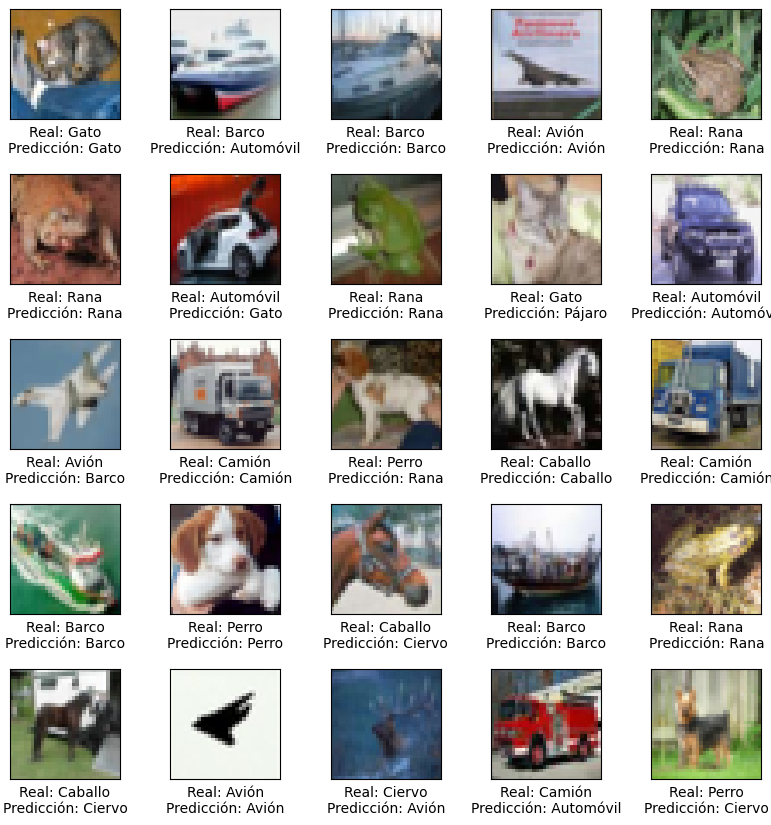

In [ ]:
# Segundo modelo
y_pred = second_model.predict(x_test)

# Convertir las etiquetas predichas y reales en arrays de una dimensión
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Convertir las etiquetas numéricas en nombres de objetos utilizando el diccionario
y_pred_names = [label_dict[label] for label in y_pred_labels]
y_test_names = [label_dict[label] for label in y_test_labels]

# Seleccionar las primeras 25 imágenes del conjunto de datos de prueba
images = x_test[:test_cases]
labels = y_test_names[:test_cases]
predictions = y_pred_names[:test_cases]

# Crear una figura de 5x5 subplots y mostrar las imágenes junto con sus etiquetas reales y predichas
fig, axes = plt.subplots(5, 5, figsize=(10,10))
fig.subplots_adjust(hspace=0.5)

hits = 0
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.set_xlabel("Real: {0}\nPredicción: {1}".format(labels[i], predictions[i]))
    if labels[i] == predictions[i]:
      hits += 1
    ax.set_xticks([])
    ax.set_yticks([])

print('ACIERTOS SEGUNDO MODELO: ' + str(hits) + '/' + str(test_cases))
plt.show()

313/313 [==============================] - 1s 4ms/step
ACIERTOS TERCER MODELO: 15/25


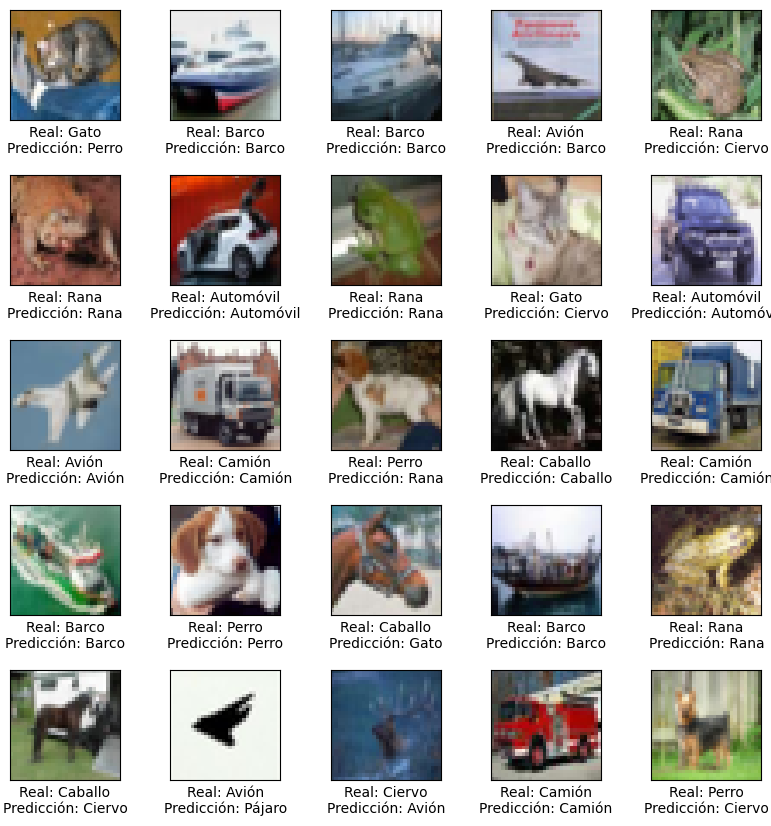

In [ ]:
# Tercer modelo
y_pred = third_model.predict(x_test)

# Convertir las etiquetas predichas y reales en arrays de una dimensión
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Convertir las etiquetas numéricas en nombres de objetos utilizando el diccionario
y_pred_names = [label_dict[label] for label in y_pred_labels]
y_test_names = [label_dict[label] for label in y_test_labels]

# Seleccionar las primeras 25 imágenes del conjunto de datos de prueba
images = x_test[:test_cases]
labels = y_test_names[:test_cases]
predictions = y_pred_names[:test_cases]

# Crear una figura de 5x5 subplots y mostrar las imágenes junto con sus etiquetas reales y predichas
fig, axes = plt.subplots(5, 5, figsize=(10,10))
fig.subplots_adjust(hspace=0.5)

hits = 0
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.set_xlabel("Real: {0}\nPredicción: {1}".format(labels[i], predictions[i]))
    if labels[i] == predictions[i]:
      hits += 1
    ax.set_xticks([])
    ax.set_yticks([])

print('ACIERTOS TERCER MODELO: ' + str(hits) + '/' + str(test_cases))
plt.show()